In [13]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [15]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [16]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,3.0,2.0,0.0,134.0,150.0,1465000.0


In [17]:
dataset.tail()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
34852,Yarraville,4,h,PI,Jas,Western Metropolitan,6543.0,6.3,4.0,1.0,3.0,593.0,NaN,1480000.0
34853,Yarraville,2,h,SP,Sweeney,Western Metropolitan,6543.0,6.3,2.0,2.0,1.0,98.0,104.0,888000.0
34854,Yarraville,2,t,S,Jas,Western Metropolitan,6543.0,6.3,2.0,1.0,2.0,220.0,120.0,705000.0
34855,Yarraville,3,h,SP,hockingstuart,Western Metropolitan,6543.0,6.3,NaN,NaN,NaN,NaN,NaN,1140000.0
34856,Yarraville,2,h,PI,RW,Western Metropolitan,6543.0,6.3,2.0,1.0,0.0,250.0,103.0,1020000.0


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   Distance       34856 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.7+ MB


In [19]:
dataset.size

487998

In [20]:
dataset.describe()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
count,34857.000000,34854.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,2.724700e+04
mean,3.031012,7572.888306,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,1.050173e+06
std,0.969933,4428.090313,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,6.414671e+05
min,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.500000e+04
25%,2.000000,4385.000000,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,6.350000e+05
50%,3.000000,6763.000000,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,8.700000e+05
75%,4.000000,10412.000000,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,1.295000e+06
max,16.000000,21650.000000,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,1.120000e+07


In [21]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
               'Propertycount', 'Distance','Bedroom2', 'Bathroom', 'Car', 
               'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

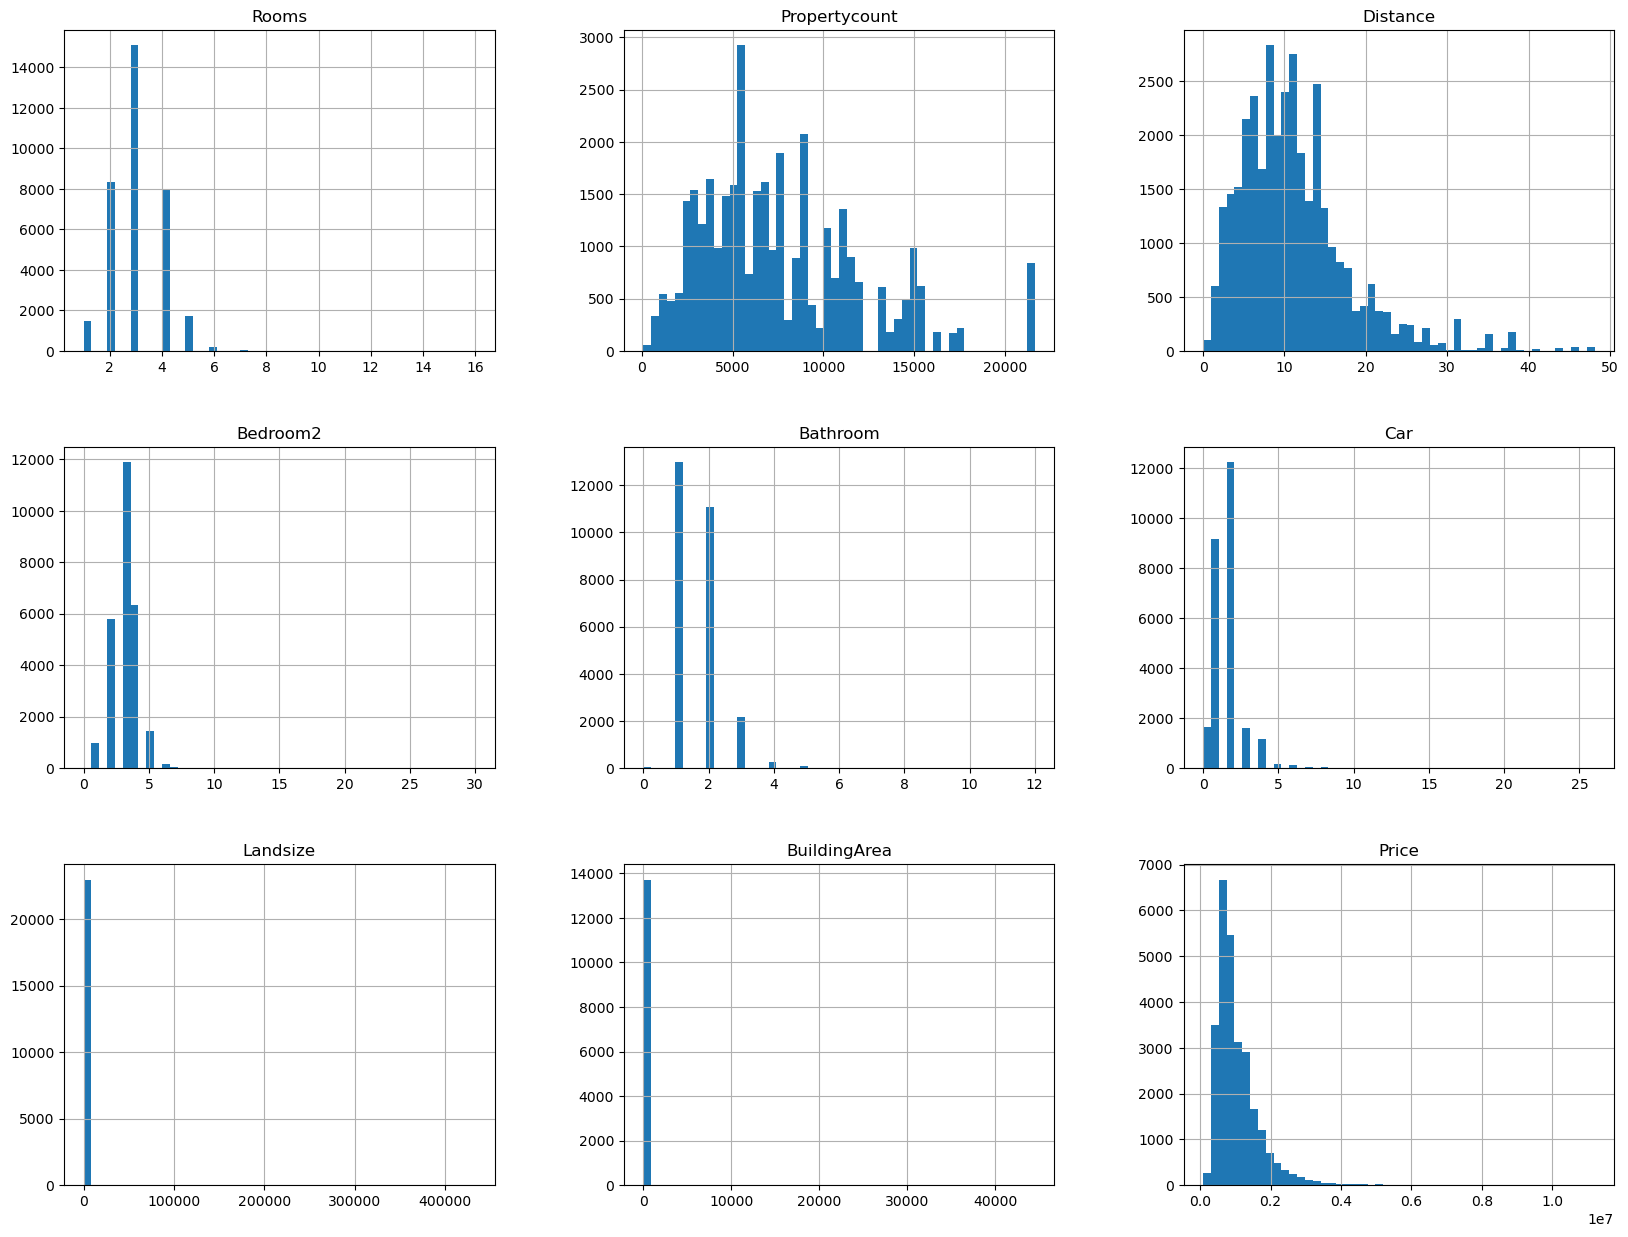

In [22]:
dataset.hist(bins = 50, figsize=(20, 15))
plt.show()

# missing values

In [23]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [24]:
dataset.dropna(inplace=True)

In [25]:
dataset.shape

(27244, 14)

# outlier handling

<Axes: xlabel='Rooms'>

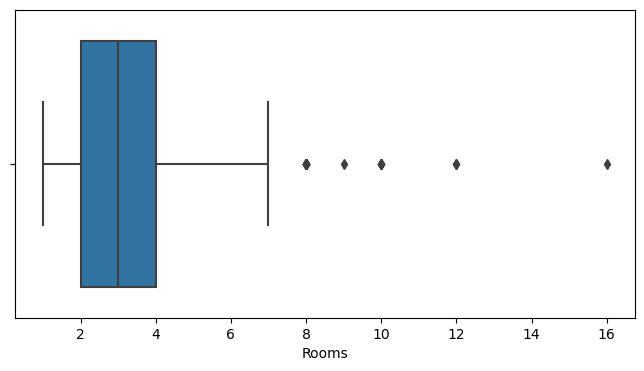

In [26]:
import seaborn as sns
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Rooms', data=dataset, orient='h')

In [27]:
from scipy import stats

q1 = dataset['Rooms'].quantile(q=0.25)
q3 = dataset['Rooms'].quantile(q=0.75)
IQR = q3-q1
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range = {} '
      .format(q1,q3,stats.iqr(dataset['Rooms'])))

1st quartile = 2.0 
3rd quartile range = 4.0 
inter quartile range = 2.0 


In [28]:
lower_outlier = q1-1.5*(IQR)
upper_outlier = q3+1.5*(IQR)

print('lower outlier = ',lower_outlier)
print('uppper outlier = ',upper_outlier)

lower outlier =  -1.0
uppper outlier =  7.0


In [29]:
print('Number of upper outlier =  ',
      dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier =  ',
      dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =   23
Number of lower outlier =   0


In [30]:
dataset.loc[(dataset['Rooms']<lower_outlier) | (dataset['Rooms']>upper_outlier),
            ['Rooms']] = dataset['Rooms'].median()

In [31]:
print('Number of upper outlier =  ',dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier =  ',dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =   0
Number of lower outlier =   0


<Axes: xlabel='Rooms'>

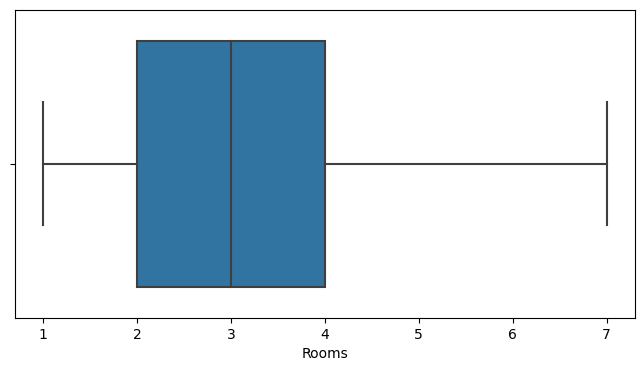

In [32]:
import seaborn as sns
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Rooms', data=dataset, orient='h')

In [33]:
for cols in dataset.columns[:-1]:
    if dataset[cols].dtype == object:
        continue
    else:
        Q1 = dataset[cols].quantile(q=0.25)
        Q3 = dataset[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        dataset.loc[(dataset[cols]<low) | (dataset[cols]>high),cols] = dataset[cols].median()

<Axes: xlabel='BuildingArea'>

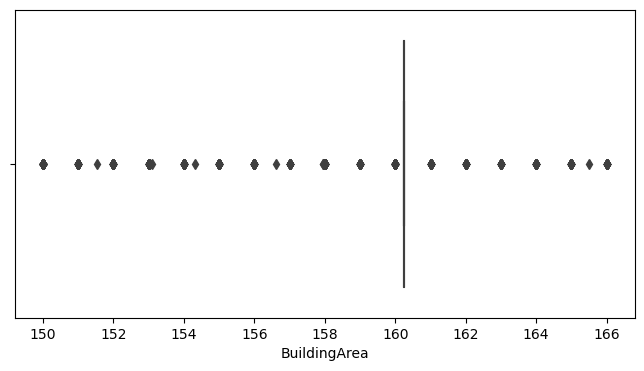

In [34]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'BuildingArea', data=dataset, orient='h')

In [35]:
dataset.corr()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,-0.069484,0.311482,0.554088,0.411772,0.348026,0.362793,-0.039481,0.464536
Propertycount,-0.069484,1.000000,-0.078625,-0.028384,-0.013974,-0.027420,-0.046722,0.007199,-0.010364
Distance,0.311482,-0.078625,1.000000,0.156576,0.100343,0.191976,0.344302,-0.025469,-0.167219
Bedroom2,0.554088,-0.028384,0.156576,1.000000,0.838180,0.717833,0.021490,-0.065623,0.299756
Bathroom,0.411772,-0.013974,0.100343,0.838180,1.000000,0.645191,-0.080908,-0.066235,0.275152
Car,0.348026,-0.027420,0.191976,0.717833,0.645191,1.000000,0.099695,-0.048828,0.202983
Landsize,0.362793,-0.046722,0.344302,0.021490,-0.080908,0.099695,1.000000,-0.004623,0.182581
BuildingArea,-0.039481,0.007199,-0.025469,-0.065623,-0.066235,-0.048828,-0.004623,1.000000,0.001780
Price,0.464536,-0.010364,-0.167219,0.299756,0.275152,0.202983,0.182581,0.001780,1.000000


In [36]:
print(dataset.shape)
dataset1_num_col = dataset.drop(['Car','Suburb', 'Type', 'Method', 
                                 'SellerG',
                                 'Regionname','Price'],axis = 1)
print(dataset1_num_col.shape)

dataset1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,150.0000
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [37]:
dataset_cat = pd.get_dummies(dataset, drop_first=True)
print(dataset_cat.shape)

(27244, 713)


In [38]:
dataset= pd.concat([dataset1_num_col,dataset_cat],axis = 1)
dataset.shape

(27244, 720)

# Data Standardization

In [39]:
X = dataset.drop('Price',axis=1)
y= dataset['Price']
print(X.shape)
print(y.shape)

(27244, 719)
(27244,)


In [40]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [25]:
Reg_predict=reg.predict(X_test)
Reg_predict2=reg.predict(X_train)

In [28]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print('r2 = ', metrics.r2_score(y_train,Reg_predict2))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score -9.192663192809993e+26
r2 =  0.6778666959333708
MSE =  3.8074481633240254e+38


####  Using Lasso (L1 Regularized) Regression

In [39]:
X = dataset.drop('Price',axis=1)
y= dataset['Price']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [43]:
y_pre_lasso_train = lasso_reg.predict(X_train)
y_pre_lasso_test = lasso_reg.predict(X_test)

In [47]:
print(lasso_reg.score(X_test,y_test))
print(lasso_reg.score(X_train,y_train))

0.6673661331684886
0.6790460706567882


In [48]:
lasso_reg.score(X_test,y_pre_lasso_test)

1.0

In [49]:
from sklearn.linear_model import Ridge
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)

Ridge()

In [51]:
y_pre_ridge_train = Ridge_reg.predict(X_train)
y_pre_ridge_test = Ridge_reg.predict(X_test)

In [52]:
print(Ridge_reg.score(X_test,y_test))
print(Ridge_reg.score(X_train,y_train))

0.6672838035793021
0.679052244967799


In [53]:
Ridge_reg.score(X_test,y_pre_lasso_test)

0.999865587065577

In [55]:
from sklearn.linear_model import ElasticNet
ElasticNet_reg = ElasticNet()
ElasticNet_reg.fit(X_train, y_train)

ElasticNet()

In [56]:
y_pre_ElasticNet_train = ElasticNet_reg.predict(X_train)
y_pre_ElasticNet_test = ElasticNet_reg.predict(X_test)

In [57]:
print(ElasticNet_reg.score(X_test,y_test))
print(ElasticNet_reg.score(X_train,y_train))

0.6279826924467491
0.6413105006559305


In [58]:
ElasticNet_reg.score(X_test,y_pre_lasso_test)

0.9406513961350275

In [60]:
X.shape

(27244, 719)